# Vorbereitungen

## Nützliche Jupyter Erweiterung
https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231

 - python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org jupyter_contrib_nbextensions
 - pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install
 
 Table of Contents (2) aktivieren

## Benötigte Packages

 - python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org graphviz
 - python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org catboost

## Imports

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Tree zeichnen
from sklearn.tree import export_graphviz
import graphviz

#Daten
from sklearn.datasets import load_breast_cancer

#Modelle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Modellbewertung
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


#Trainings- und Testdaten trennen
from sklearn.model_selection import train_test_split

#Bilder
from IPython.display import Image

# Data preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Misc
import os


os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## Hilfsfunktionen

In [3]:
def analyze_decision_tree(tree_model):
    export_graphviz(tree_model, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
    with open("tree.dot") as f:
        dot_graph = f.read()
        display(graphviz.Source(dot_graph))

# scikit learn Bibliothek

https://scikit-learn.org/stable/

Prinzipieller Aufbau der API

 -  Model() / Modell erstellen
 -  fit(X_train, y_train) / Modell trainieren
 -  predict(X_test) / Modell für Schätzung nutzen
 -  score(X_test, y_test) / Modell evaluieren
 
 

# Supervised Learning

## Classification

### Entscheidungsbaum (DecisionTreeClassifier)

#### Einführungsbeispiel

![Tree](images/tree.png)

## Beispieldatensatz: breast cancer 

https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/

### Datensatz laden

In [4]:
cancer = load_breast_cancer()

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Wie ist der Datensatz aufgebaut?

In [6]:
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [7]:
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

Welche Dimensionen hat der Datensatz?

In [9]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [10]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### Datensatz analyisieren

In [11]:
df_cancer = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df_cancer['target'] = cancer.target

In [12]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
df_cancer.iloc[:,0:30].describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Wie sind benign und malignant im Datensatz vertreten?

In [14]:
print('{:.1f}% benign, {:.1f}% malignant'.format(df_cancer.target.value_counts()[1]/df_cancer.target.size*100,df_cancer.target.value_counts()[0]/df_cancer.target.size*100))

62.7% benign, 37.3% malignant


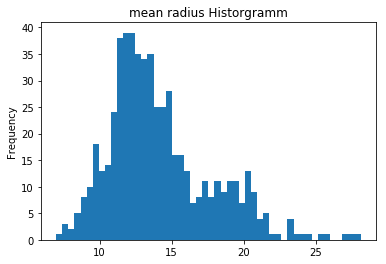

In [31]:
df_cancer['mean radius'].plot(kind='hist',bins=50,title='mean radius Historgramm')

In [32]:
help(df_cancer.plot)

Help on FramePlotMethods in module pandas.plotting._core object:

class FramePlotMethods(BasePlotMethods)
 |  DataFrame plotting accessor and method
 |  
 |  Examples
 |  --------
 |  >>> df.plot.line()
 |  >>> df.plot.scatter('x', 'y')
 |  >>> df.plot.hexbin()
 |  
 |  These plotting methods can also be accessed by calling the accessor as a
 |  method with the ``kind`` argument:
 |  ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
 |  
 |  Method resolution order:
 |      FramePlotMethods
 |      BasePlotMethods
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __call__(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, rot=None, font

## Entscheidungsbaum (DecisionTreeClassifier)

### Aufteilung der Daten
Wir teilen die Daten in einen Training- und Testdatensatz auf. 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [33]:
cancer = load_breast_cancer()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
                        cancer.data, 
                        cancer.target,
                        test_size=0.25,
                        stratify=cancer.target, 
                        random_state=42)

In [35]:
print("Anzahl Trainingsdatensätze: {},".format(X_train.shape))
print("Anzahl Testdatensätze: {},".format(X_test.shape))

Anzahl Trainingsdatensätze: (426, 30),
Anzahl Testdatensätze: (143, 30),


### Modell erstellen
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [36]:
tree = DecisionTreeClassifier(random_state=0, max_depth=None)

### Modell trainieren

In [37]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Modell analysieren

In [38]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.000


In [39]:
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on test set: 0.937


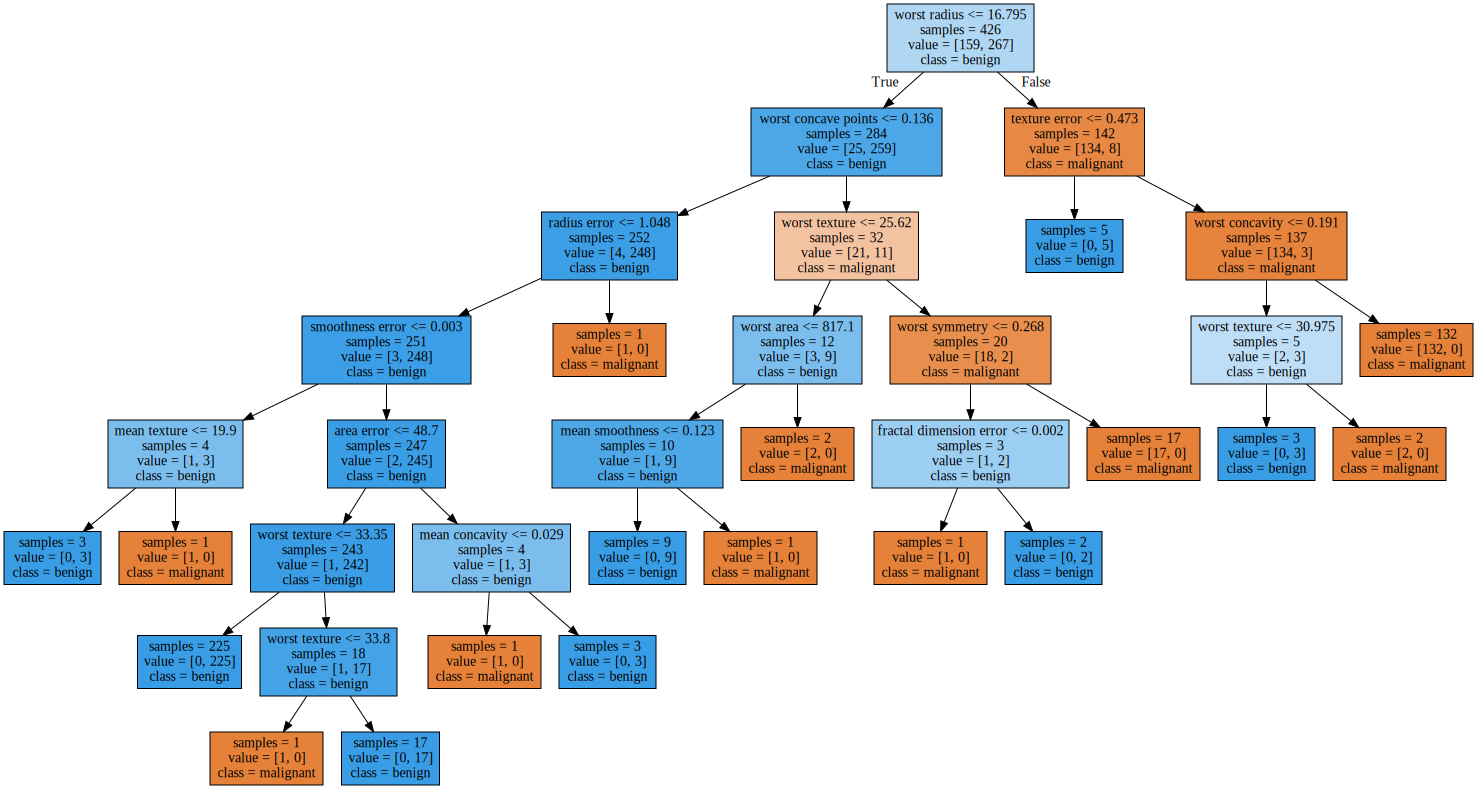

In [40]:
analyze_decision_tree(tree)

##### Building decision trees

## Generalisierung, Overfitting und Underfitting

### Was ist Overfitting?

![overfitting_example](images/OverfittingExample.png)

![overfitting_depth_1](images/Overfitting-depth_1.png)

![overfitting_example](images/Overfitting-depth_2.png)

![overfitting_example](images/Overfitting-depth_9.png)

### Was ist Underfitting

In [ ]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
                        cancer.data, 
                        cancer.target,
                        test_size=0.25,
                        stratify=cancer.target, 
                        random_state=42)

In [ ]:
svm_model = SVC(kernel='linear',C=0.000000001)

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
print("Accuracy on training set: {:.3f}".format(svm_model.score(X_train, y_train)))

In [ ]:
print("Accuracy on test set: {:.3f}".format(svm_model.score(X_test, y_test)))

### Verallgemeinerungsleistung prüfen (Kreuzvalidierug)

Kreuzvalidierung ist eine statistische Methode zum Auswerten der Verallgemeinerungsleistung eines ML-Modells

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [ ]:
cancer = load_breast_cancer()
tree = DecisionTreeClassifier(random_state=0)

 - Bei Klassifizierung wird standardmässig die stratifizierte k-fache Kreuzvalidierung eingesetzt! 
 - Bei einer Regression die k-fache Kreuzvalidierung!

In [ ]:
scores = cross_val_score(tree, X=cancer.data,y=cancer.target,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean times and scores: ", scores.mean())

### Kontrollieren der Komplexität von Entscheidungsbäumen am Beispiel

**Hyperparameter**

 -  max_depth:       Maximale Tiefe des Baumes
 -  max_leaf_nodes:  Maximale Anzahl der Blätter

#### Aufteilung der Daten

In [ ]:
cancer = load_breast_cancer()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                        cancer.data, 
                        cancer.target,
                        test_size=0.25,
                        stratify=cancer.target, 
                        random_state=42)

#### Modell erstellen
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
tree = DecisionTreeClassifier(random_state=0,max_depth=5,max_leaf_nodes=None)

#### Modell trainieren

In [ ]:
tree.fit(X_train, y_train)

#### Modell analysieren

In [ ]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Kreuzvalidierung

In [ ]:
scores = cross_val_score(tree, X=cancer.data,y=cancer.target,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean times and scores: ", scores.mean())

In [ ]:
analyize_decision_tree(tree)

# Ensembles of Decision Trees

## Random forests
 -  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
 -  https://scikit-learn.org/stable/documentation.html

In [41]:
cancer = load_breast_cancer()

In [206]:
dataset = pd.read_csv('./../data/train.csv', encoding='ISO-8859-1')
dataset.drop(labels=['polnum', 'deck', 'markname', 'zepplz'], inplace=True, axis=1)
#print(pd.DataFrame(dataset))
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:].values
print(pd.DataFrame(X))

                          0       1       2      3   4     5     6  7  8   9   \
0         SUV / Geländewagen   33190   33190   3319   6  1998  1655  5  N  71   
1         SUV / Geländewagen   37190   37190   3719   6  1998  1655  5  N  74   
2                Microklasse   16590   16590   1659   8   996   930  4  N  54   
3         SUV / Geländewagen   73202   69100  11012   6  2993  1895  5  N  62   
4       Kompaktvan / Minivan   24500   24500   2450  11  1598  1375  5  N  84   
5       Kompaktvan / Minivan   49100   49100   4910  10  1995  1965  7  N  58   
6                 Kleinwagen   23310   23310   2331  10  1298  1130  5  N  67   
7         SUV / Geländewagen   36000   36000   3600   2  1987  1690  5  N  75   
8                 Kleinwagen   23770   23770   2377   8  1390  1070  5  N  76   
9       Cabriolet / Roadster   31900   31900   3190  14  1997  1242  4  N  74   
10        SUV / Geländewagen   51900   51900   5190   5  1995  1790  5  N  67   
11       Untere Mittelklasse

In [207]:
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])
X[:, 8] = labelencoder.fit_transform(X[:, 8])
X[:, 10] = labelencoder.fit_transform(X[:, 10])
print(pd.DataFrame(X))

        0       1       2      3   4     5     6  7  8   9   10
0       10   33190   33190   3319   6  1998  1655  5  1  71  16
1       10   37190   37190   3719   6  1998  1655  5  1  74  16
2        7   16590   16590   1659   8   996   930  4  1  54  20
3       10   73202   69100  11012   6  2993  1895  5  1  62  16
4        5   24500   24500   2450  11  1598  1375  5  1  84  20
5        5   49100   49100   4910  10  1995  1965  7  1  58  16
6        4   23310   23310   2331  10  1298  1130  5  1  67  20
7       10   36000   36000   3600   2  1987  1690  5  1  75   2
8        4   23770   23770   2377   8  1390  1070  5  1  76  16
9        0   31900   31900   3190  14  1997  1242  4  1  74  16
10      10   51900   51900   5190   5  1995  1790  5  1  67  16
11      12   51990   51990   5199  17  1781  1550  5  1  64   6
12      10   35350   35350   3535   4  1997  1763  5  1  77  16
13      13   29340   29340   2934   9  1796  1503  7  1  67  20
14       8   48500   48500   4850   8  1

In [209]:
onehotencoder = OneHotEncoder(categorical_features=[0, 8, 10])
X = onehotencoder.fit_transform(X).toarray()
print(pd.DataFrame(X))

C:\Program Files\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Program Files\Python36\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


         0    1    2    3    4    5    6    7    8    9   ...    41   42  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
5       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
6       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
7       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
8       0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
9       1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
10      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
11      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0   
12      0.0 

In [210]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, 
                        y,
                        test_size=0.25,
                        stratify=y, 
                        random_state=42)

In [211]:
#help(RandomForestClassifier)
random_forest = RandomForestClassifier(random_state=0, n_estimators=500, criterion='gini', max_depth=3)

In [212]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [213]:
print("Accuracy on training set: {:.3f}".format(random_forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(random_forest.score(X_test, y_test)))

Accuracy on training set: 0.764
Accuracy on test set: 0.764


Kreuzvalidierung

In [124]:
scores = cross_val_score(random_forest, X=cancer.data,y=cancer.target,cv=10)
print("Cross-validation scores: {}".format(scores))
print("Mean times and scores: ", scores.mean())

Cross-validation scores: [0.62068966 0.62068966 1.         0.89473684 0.96491228 0.94736842
 0.89473684 0.625      0.625      0.625     ]
Mean times and scores:  0.781813369630974


## Gradient Boosted Regression Trees (Gradient Boosting Machines)

 -  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier

In [ ]:
cancer = load_breast_cancer()

In [161]:
dataset = pd.read_csv('./../data/train.csv', encoding='ISO-8859-1')
dataset.drop(labels=['polnum', 'deck', 'zepplz'], inplace=True, axis=1)
print(pd.DataFrame(dataset))
y = dataset.iloc[:, 0]
X = dataset.iloc[:, 1:]

        target  markname              etklasse   fzgwert  katpreis  zubehoer  \
0            1   HYUNDAI    SUV / Geländewagen   33190.0     33190      3319   
1            1   HYUNDAI    SUV / Geländewagen   37190.0     37190      3719   
2            0    NISSAN           Microklasse   16590.0     16590      1659   
3            1       BMW    SUV / Geländewagen   73202.0     69100     11012   
4            0      OPEL  Kompaktvan / Minivan   24500.0     24500      2450   
5            0   RENAULT  Kompaktvan / Minivan   49100.0     49100      4910   
6            1    TOYOTA            Kleinwagen   23310.0     23310      2331   
7            1    TOYOTA    SUV / Geländewagen   36000.0     36000      3600   
8            1        VW            Kleinwagen   23770.0     23770      2377   
9            1   PEUGEOT  Cabriolet / Roadster   31900.0     31900      3190   
10           1       BMW    SUV / Geländewagen   51900.0     51900      5190   
11           0      AUDI   Untere Mittel

C:\Users\remi\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [162]:
X_train, X_test, y_train, y_test = train_test_split(
                        cancer.data, 
                        cancer.target,
                        test_size=0.25,
                        stratify=cancer.target, 
                        random_state=42)

### Default Hyperparameter

In [163]:
gbrt = GradientBoostingClassifier(random_state=0)

In [164]:
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


Kreuzvalidierung

In [ ]:
scores = cross_val_score(gbrt, X=cancer.data,y=cancer.target,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean times and scores: ", scores.mean())

### Hyperparameter max_depth

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, n_estimators=1000, max_depth=5)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Kreuzvalidierung

In [ ]:
scores = cross_val_score(gbrt, X=cancer.data,y=cancer.target,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean times and scores: ", scores.mean())

### Hyperparameter learning_rate

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0,n_estimators=800, max_depth=2, learning_rate=0.1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Kreuzvalidierung

In [ ]:
scores = cross_val_score(gbrt, X=cancer.data,y=cancer.target,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean times and scores: ", scores.mean())

## CatBoostClassifier

https://catboost.ai/docs/concepts/about.html

Benötigt folgendes Package

 -  python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org catboost

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
model = CatBoostClassifier(depth=2,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=True)
# train the model
model.fit(X_train, y_train,verbose=False)

In [ ]:
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Kreuzvalidierung

In [ ]:
scores = cross_val_score(model, X=cancer.data,y=cancer.target,cv=5)
print("Cross-validation scores: {}".format(scores))
print("Mean times and scores: ", scores.mean())

# Spielwiese: Empfehlungssystem mittels Klassifikation

![real_example](images/real_example.png)

## Import Data

In [ ]:
mf_data = pd.read_csv('./data/train.csv')

In [ ]:
mf_data.head()

## Prepare dataFrame

lösche die Kolonnen: 'polnum','deck','zepplz'

In [ ]:
mf_data = mf_data.drop(['polnum','deck','zepplz'], axis=1)

In [ ]:
mf_data.head()

# Zusammenfassung

# Ausblick

## Evaluationsmetriken

### confusion_matrix

In [ ]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
                        cancer.data, 
                        cancer.target,
                        test_size=0.25,
                        stratify=cancer.target, 
                        random_state=42)

In [ ]:
tree = DecisionTreeClassifier(random_state=0,max_depth=None,max_leaf_nodes=None)
tree.fit(X_train, y_train)

In [ ]:
tree_prediction = tree.predict(X_test)

In [ ]:
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
confusion = confusion_matrix(y_test, tree_prediction)
print("Confusion matrix:\n{}".format(confusion))

**Interpretation der Matrix**
 -  Zeilen entsprechen den tatsächlichen Kategorien
 -  Spalten beschreiben die vorhergesagten Kategorien

 - 1. Zeile entspricht malignant (Wert 0)
 - 2. Zeile entspricht benign (Wert 1)

In [ ]:
print(classification_report(y_test, tree_prediction, target_names=['malignant', 'benign']))

 -  precision: Wieviele vom Modell als positive geschätzte Kategorie ist tatsächlich positiv
 -  recall: Wieviel von den tatsächlich positiven wurde vom Modell als positiv geschätzt

## Wie findet man die besten Hyperparameter?

### GridSearch

## Andere ML Modelle

## Deep Learning (Neuronal Net)